This notebook is about loading and discovering the input data. Basically, it is just the starting point of our project. When you go over this notebook, you will examine the input data's characteristics, distributions of classes, and correlations between features, if there are any.

If you didn't install the required packages before, you can with the commented out line below. Otherwise, you will get errors at the first import.

In [1]:
#!pip install torch numpy transformers datasets tiktoken wandb tqdm matplotlib seaborn scipy scikit-learn

In [2]:
import wandb
from data.utils.eda import load_data, plot_sentiment_distribution, plot_feature_importance, \
    plot_sentiment_distribution_by_feature

We will initialize the Weights & Biases project now. If you are not logged in to your wandb account, in this step you should enter your wandb credentials.

In [3]:
wandb.init(
    project="DI725_assignment_1_2389088_eda"
)
config = wandb.config

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: erennarin-92 (erennarin-92-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


We can start to discover our data. Input data paths are defined in other parts of the project, so we can just call the load_data() method to load and summarize the data.

In [4]:
df_train, df_test = load_data()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
dtypes: object(11)
memory usage: 83.5+ KB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Da

As you can see, there are 970 observations in our training set and 30 observations in our test set. There is no null value, and all data is labeled ('customer_sentiment' values are labels).

Let's check the distribution of the sentiment labels.

/home/eren/Drive/METU/Courses/[DI 725] Transformers and Attention-Based Deep Networks/Assignments/Assignment 1/DI725_assignment1/data/utils/eda.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target, palette="coolwarm")


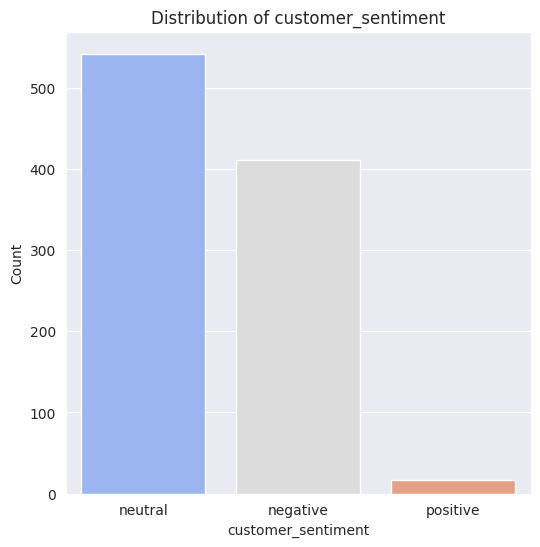

In [5]:
plot_sentiment_distribution(df_train, "customer_sentiment")

As you can see, positive cases are very rare. We should consider this when we split the data.

Before checking distributions by features, since there are multiple features, we can check feature importance first. Chi-square contingency calculation is used here to determine feature importance.


Most Influential Parameters on customer_sentiment:
issue_sub_category: Chi2 Score = 1940.00, P-Value = 0.00000
issue_category_sub_category: Chi2 Score = 1940.00, P-Value = 0.00000
conversation: Chi2 Score = 1940.00, P-Value = 0.45736
issue_category: Chi2 Score = 1059.21, P-Value = 0.00000
issue_area: Chi2 Score = 168.89, P-Value = 0.00000
product_sub_category: Chi2 Score = 88.25, P-Value = 0.74960
agent_experience_level: Chi2 Score = 9.26, P-Value = 0.05492
agent_experience_level_desc: Chi2 Score = 9.26, P-Value = 0.05492
product_category: Chi2 Score = 6.91, P-Value = 0.14093
issue_complexity: Chi2 Score = 3.30, P-Value = 0.50890


/home/eren/Drive/METU/Courses/[DI 725] Transformers and Attention-Based Deep Networks/Assignments/Assignment 1/DI725_assignment1/data/utils/eda.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=params, y=chi2_scores, palette="coolwarm")


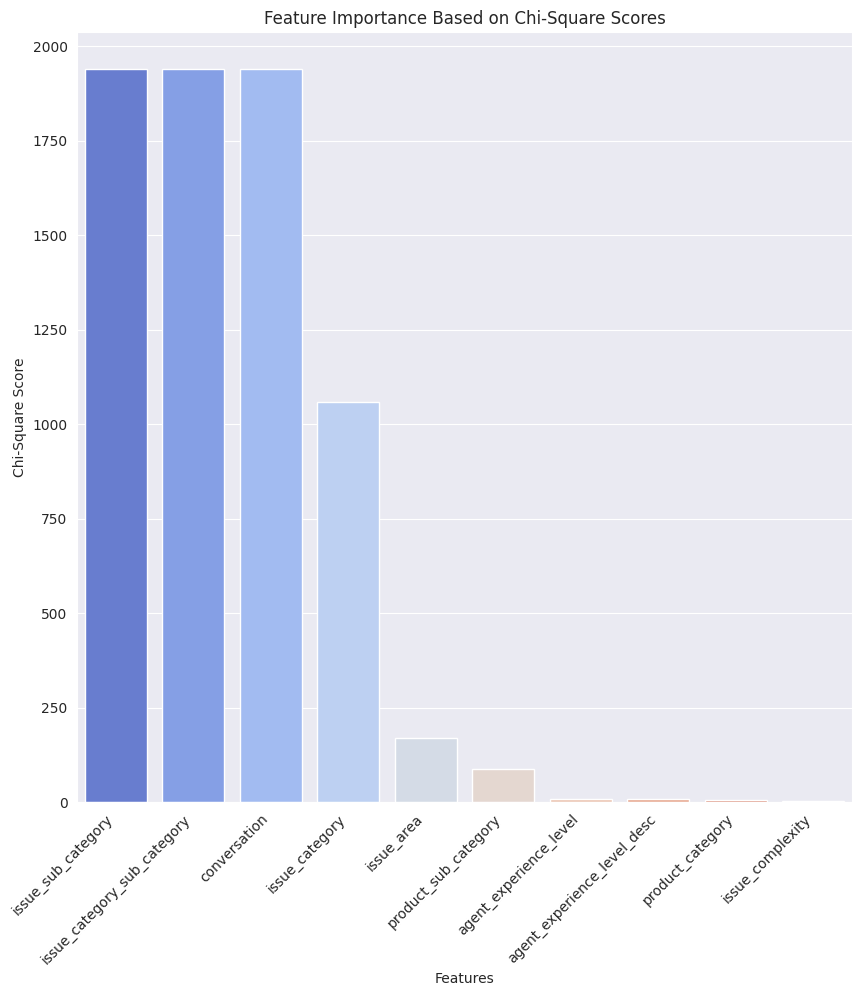

In [6]:
plot_feature_importance(df_train, "customer_sentiment")

It seems like 'issue_sub_category' and 'issue_category_sub_category' are the most influential features on customer sentiment. 'conversation' is also highly important, as we expect, but since it is not a categorical feature, we won't investigate it further in this notebook.

Checking the sentiment distribution across important features may give some important insights too.

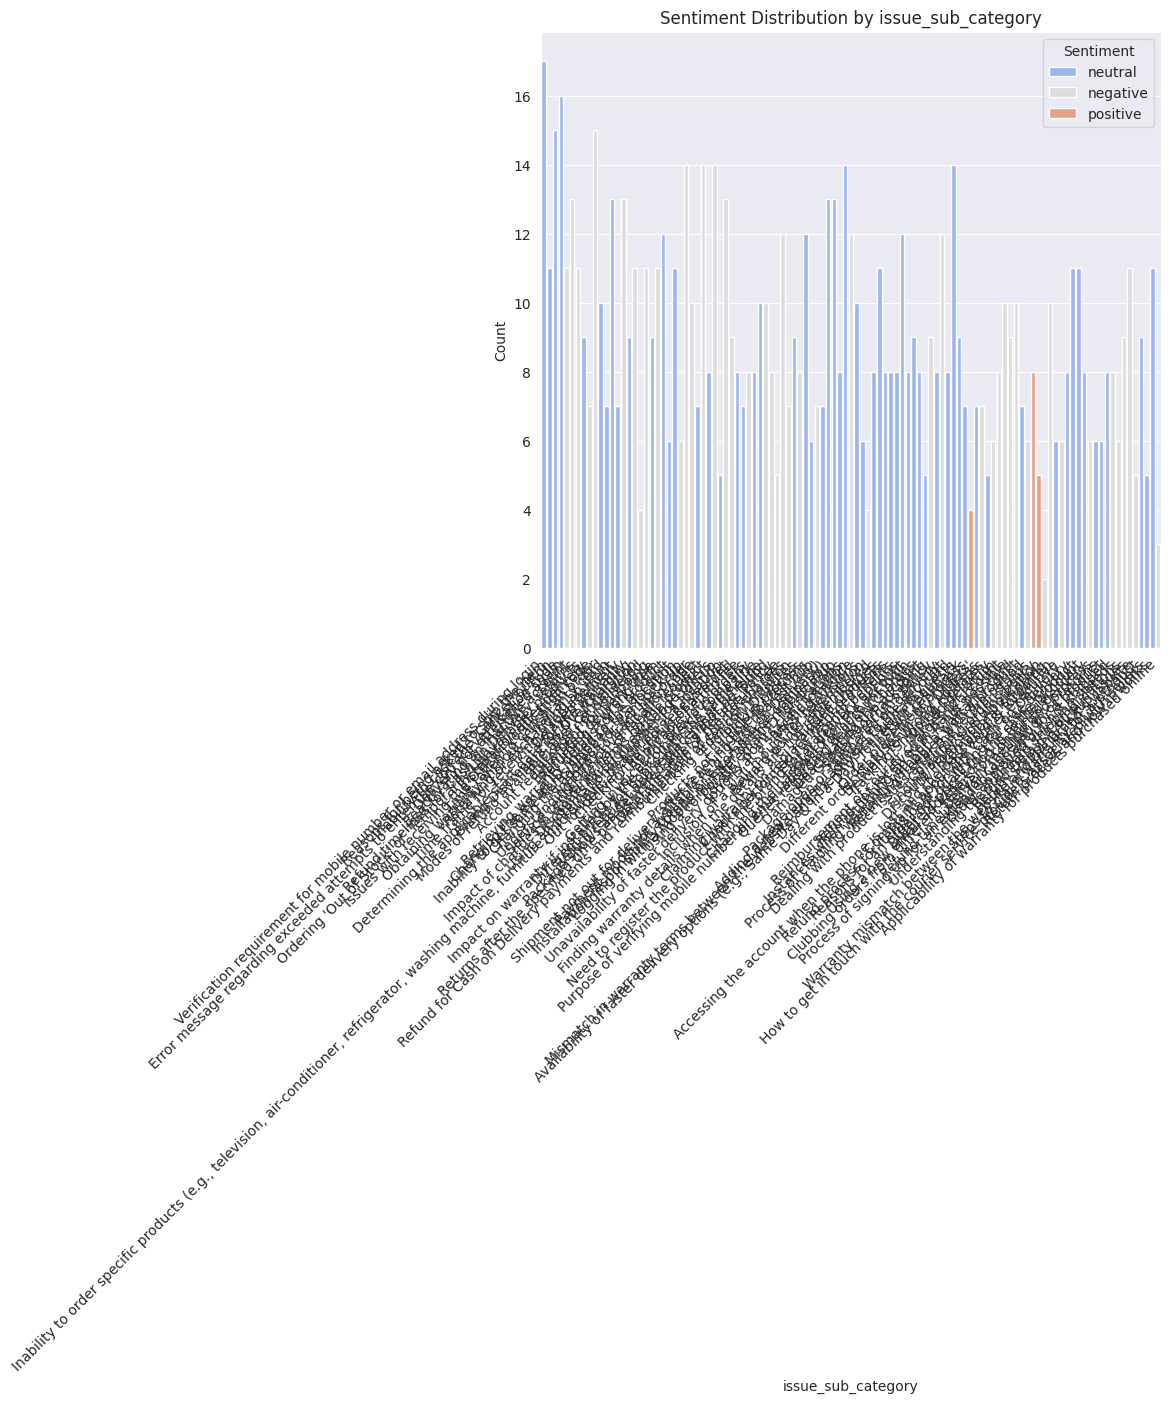

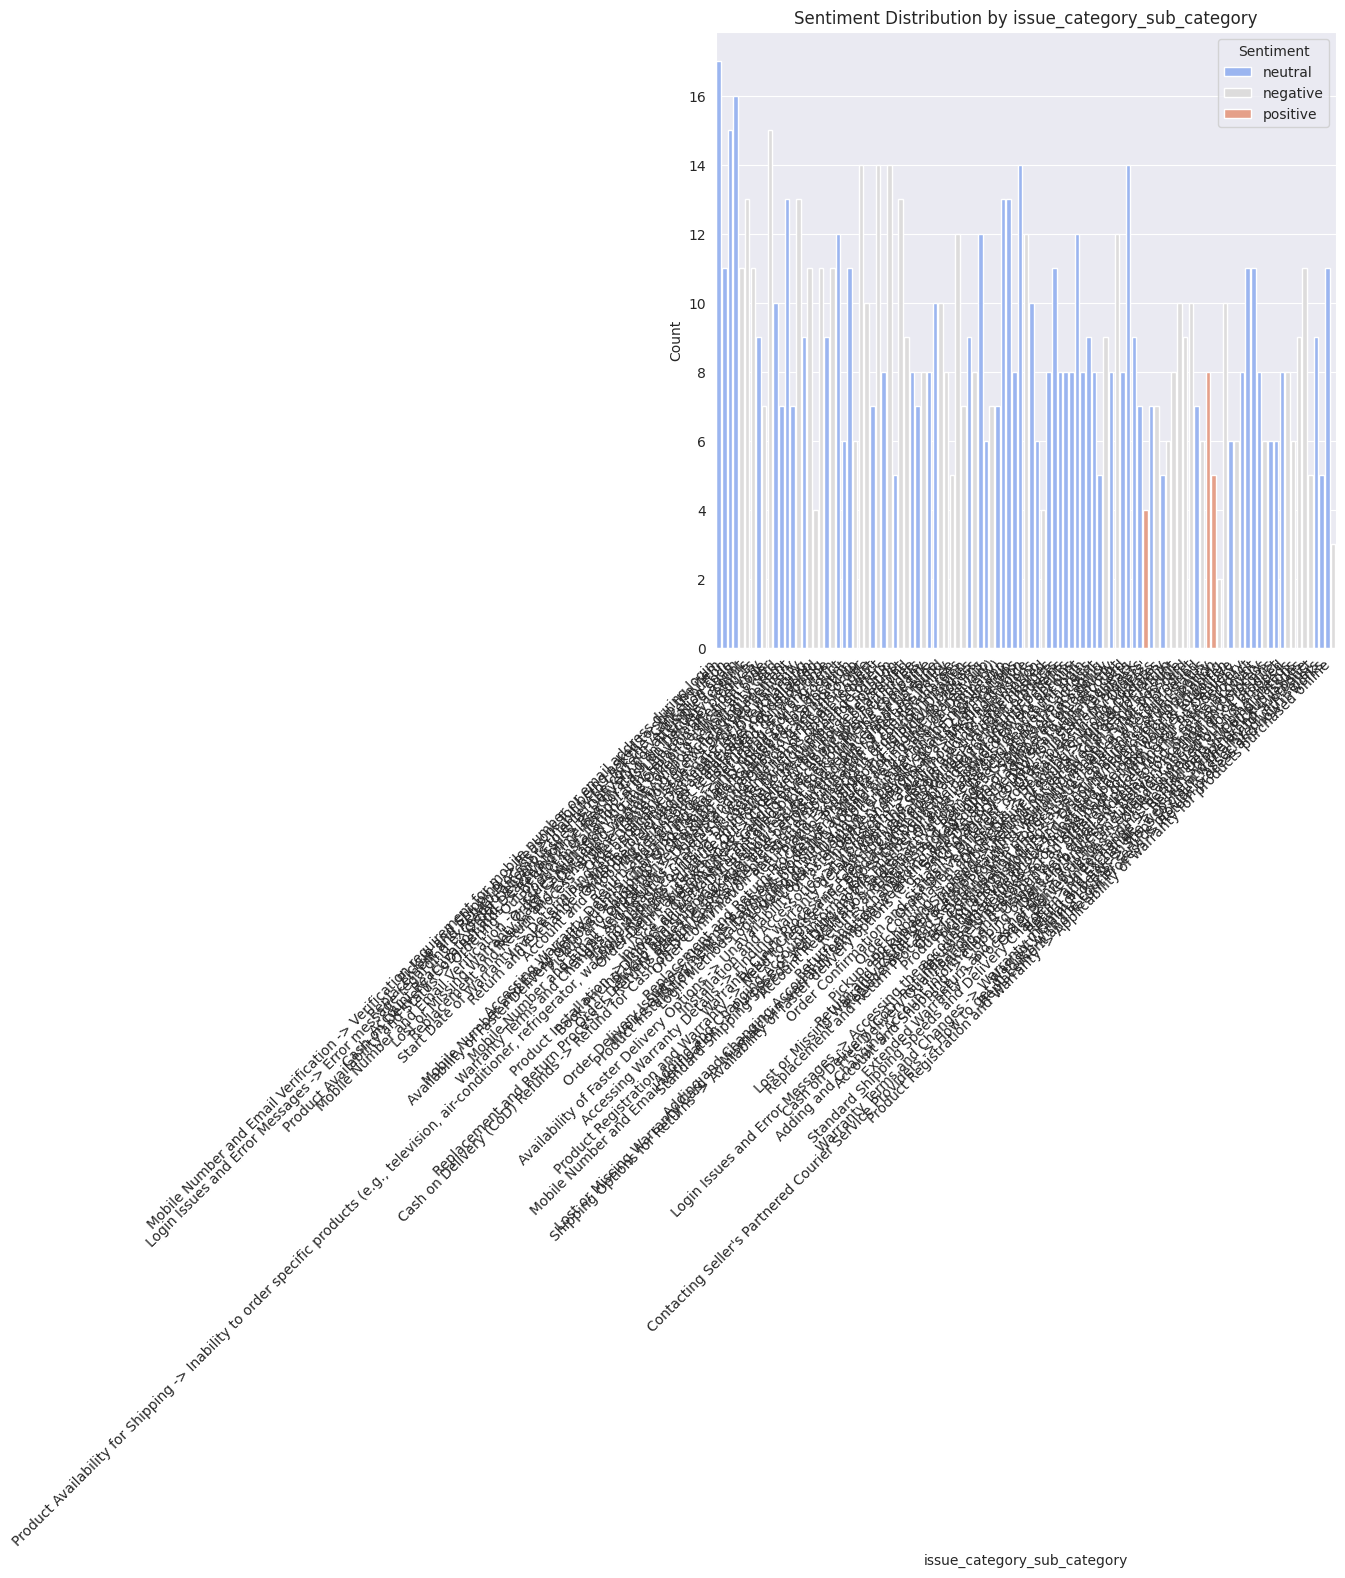

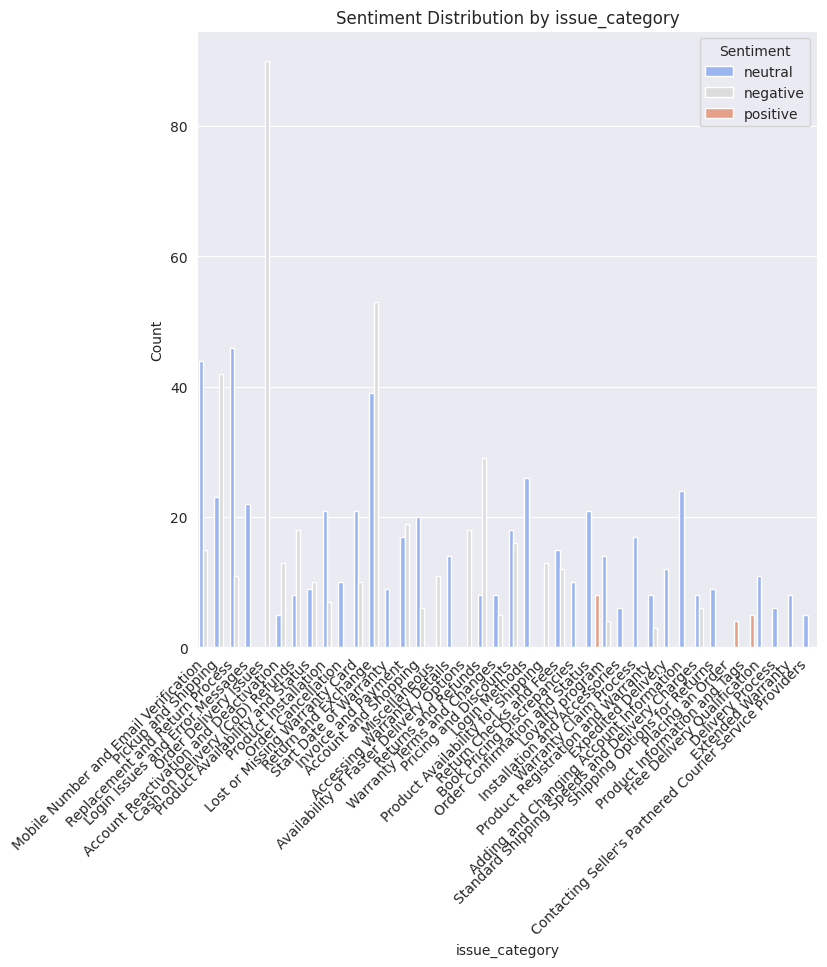

In [7]:
plot_sentiment_distribution_by_feature(df_train,
                                       ["issue_sub_category", "issue_category_sub_category", "issue_category"],
                                       "customer_sentiment")

These plots are very crowded, but when you look closely (you can check the media files under related wandb run for further investigation), it seems like we can give good service when a customer wants to place and order or confirm an order. Otherwise, almost none of the customer sentiments are positive. Selling products is not only about collecting orders. As the automation team, maybe we should inform the management about this output.